In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_drop = train.drop(['label'], axis=1)
train_drop.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
(train.shape, test.shape)

((42000, 785), (28000, 784))

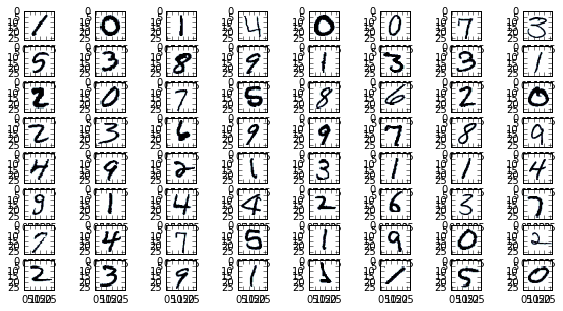

In [6]:
# plot some numbers
plt.figure(figsize = (10,5))
for digit_num in range(0,64):
    plt.subplot(8,8,digit_num+1)
    grid_data = train_drop.iloc[digit_num].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "bone_r")

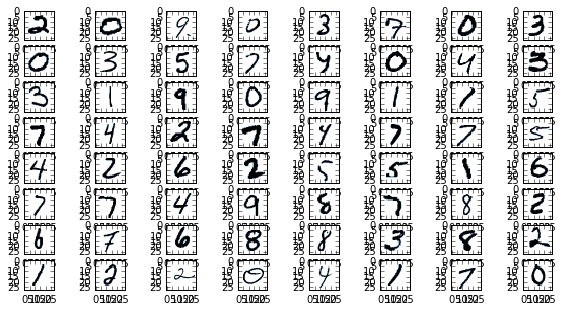

In [7]:
# plot some numbers
plt.figure(figsize = (10,5))
for digit_num in range(0,64):
    plt.subplot(8,8,digit_num+1)
    grid_data = test.iloc[digit_num].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "bone_r")

In [8]:
x_train = train_drop.iloc[:,:].values
x_test = test.iloc[:, :].values
y_train = train.iloc[:,0].values
(x_train.shape, x_test.shape, y_train.shape)

((42000L, 784L), (28000L, 784L), (42000L,))

In [9]:
y_train[:5]

array([1, 0, 1, 4, 0], dtype=int64)

In [10]:
from sklearn.cross_validation import train_test_split

x_train_train, x_train_val, y_train_train, y_train_val = train_test_split(x_train, y_train, test_size=0.2)
x_train_train.shape, x_train_val.shape, y_train_train.shape, y_train_val.shape

((33600L, 784L), (8400L, 784L), (33600L,), (8400L,))

In [13]:
import time

def time_diff_str(t1, t2):
    """
    Calculates time durations.
    """
    diff = t2 - t1
    mins = int(diff / 60)
    secs = round(diff % 60, 2)
    return str(mins) + " mins and " + str(secs) + " seconds"

In [12]:
#from operator import itemgetter
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier

#names = ["Naive Bayes", "Linear SVM", "Decision Tree", "Random Forest", "AdaBoost", "QDA"]
 
#classifiers = [GaussianNB(),
#               SVC(kernel="linear", C=0.025),
#               DecisionTreeClassifier(max_depth=5),
#               RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1),
#               AdaBoostClassifier(),
#               QuadraticDiscriminantAnalysis()]

In [13]:
#results = {}
#times = {}

#for name, clf in zip(names, classifiers):
#    t0 = time.time()
#    clf.fit(x_train_train, y_train_train)
#    results[name] = clf.score(x_train_val, y_train_val)
#    times[name] = time_diff_str(t0, time.time())

#print "---------------------------"
#print "Evaluation results"
#print "---------------------------"
#sorted(results.items(), key=itemgetter(1))

C:\Users\anhnt109\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


---------------------------
Evaluation results
---------------------------


[('Naive Bayes', 0.54702380952380958),
 ('QDA', 0.5496428571428571),
 ('Decision Tree', 0.67345238095238091),
 ('AdaBoost', 0.70619047619047615),
 ('Random Forest', 0.76726190476190481),
 ('Linear SVM', 0.91249999999999998)]

In [14]:
#for name in results:
#    print name + " accuracy: %0.3f" % results[name]
#    print "Time: %s" % times[name]
#    print "----------------"

QDA accuracy: 0.550
Time: 0 mins and 6.81 seconds
----------------
Decision Tree accuracy: 0.673
Time: 0 mins and 3.63 seconds
----------------
Naive Bayes accuracy: 0.547
Time: 0 mins and 1.64 seconds
----------------
Linear SVM accuracy: 0.912
Time: 32 mins and 29.25 seconds
----------------
AdaBoost accuracy: 0.706
Time: 0 mins and 37.94 seconds
----------------
Random Forest accuracy: 0.767
Time: 0 mins and 1.86 seconds
----------------


In [ ]:
#from sklearn.cross_validation import KFold

#kf = KFold(len(x_train), n_folds=10, shuffle=True, random_state=4)

#clf = SVC(kernel='linear', C=0.025)

#for train_index, val_index in kf:
#    clf.fit(x_train[train_index], y_train[train_index])
#    print 'Accuracy: %0.3f'% clf.score(x_train[val_index], y_train[val_index])

In [14]:
from sklearn.svm import SVC
import time

clf = SVC(kernel='linear', C=0.025)
t0 = time.time()
clf.fit(x_train_train, y_train_train)
print 'Accuracy: %0.3f'% clf.score(x_train_val, y_train_val)
print "Time: %s" % time_diff_str(t0, time.time())

Accuracy: 0.912
Time: 29 mins and 25.29 seconds


In [26]:
y_test = np.ceil(np.abs(clf.predict(x_test))).astype(int)

In [31]:
result = pd.DataFrame(test.index+1)
result.columns = ['ImageID']

In [32]:
result['Label'] = y_test
result.head()

,ImageID,Label
0,1,2
1,2,0
2,3,5
3,4,4
4,5,3


In [33]:
result.to_csv('Submission_SVC.csv', index=False)